In [2]:
import gudhi
import numpy as np
import pandas as pd
import scipy.io

In [ ]:
def nodesExtractor(name): #extracts nodes and their corresponding information
    file_path = 'Networks/Network_Vessels_' + name +'.mat'
    matlab_data = scipy.io.loadmat(file_path)
    # Extract the 'connectivity' field from the 'Data' structured array
    data_structure = matlab_data['nodesC2']
    # Reshape or ensure it's a proper 2D array (if required)
    nodes_data = data_structure.squeeze()
    # Create a DataFrame from the connectivity data
    nodes_df = pd.DataFrame(nodes_data, columns=['NodeID', 'X', 'Y', 'Z', 'Degree'])
    # Save the DataFrame to inspect it
    return nodes_df

def edgesExtractor(name): #extracts segments to create a dataframe of from and to nodes
    file_path = 'Networks/Network_Vessels_' + name +'.mat'
    matlab_data = scipy.io.loadmat(file_path)
    # Extract the 'connectivity' field from the 'Data' structured array
    data_structure = matlab_data['segments']
    # Reshape or ensure it's a proper 2D array (if required)
    edges_data = data_structure.squeeze()
    # Create a DataFrame from the connectivity data
    edge_df = pd.DataFrame(edges_data, columns=['ID', 'From', 'To'])
    # Save the DataFrame to inspect it
    return edge_df

def inputForGUDHI(name, height): #height is 1 for x, 2 for y, 3 for z
    #this creates the correct data format for GUDHI to run 0-D persistence
    edge_df = edgesExtractor(name)
    node_df = nodesExtractor(name)
    edges = list(edge_df.iloc[:,[1,2]].itertuples(index=False,name=None))
    node_heights = dict(zip(node_df.iloc[:,0],node_df.iloc[:,height]))
    return edges, node_heights

{0: 2, 1: 6, 2: 122, 3: 116, 4: 98, 5: 89, 6: 145, 7: 146, 10: 125, 11: 129, 14: 121, 15: 114, 16: 140, 17: 140, 18: 201, 19: 200, 20: 78, 21: 92, 22: 169, 23: 168, 25: 179, 26: 117, 27: 121, 28: 210, 29: 92, 30: 105, 31: 90, 32: 94, 33: 65, 34: 85, 35: 117, 37: 143, 38: 141, 39: 80, 40: 74, 41: 143, 42: 142, 43: 103, 44: 43, 45: 49, 46: 212, 47: 212, 48: 202, 49: 212, 54: 226, 56: 87, 57: 93, 58: 93, 63: 90, 64: 89, 65: 65, 66: 66, 67: 213, 68: 207, 69: 119, 70: 114, 71: 48, 72: 53, 73: 238, 74: 239, 77: 236, 79: 158, 80: 166, 81: 130, 82: 125, 83: 116, 84: 117, 85: 61, 86: 60, 90: 233, 91: 239, 92: 229, 93: 113, 94: 111, 95: 172, 97: 27, 98: 30, 99: 127, 100: 126, 101: 60, 102: 72, 103: 105, 104: 139, 106: 193, 107: 190, 110: 139, 111: 143, 112: 135, 113: 128, 114: 92, 115: 93, 118: 249, 124: 34, 125: 169, 126: 167, 129: 200, 130: 198, 131: 180, 133: 82, 134: 87, 136: 12, 137: 118, 138: 110, 139: 238, 140: 218, 143: 187, 144: 178, 145: 193, 149: 156, 150: 175, 152: 164, 153: 168, 154

<Axes: title={'center': 'Persistence barcode'}>

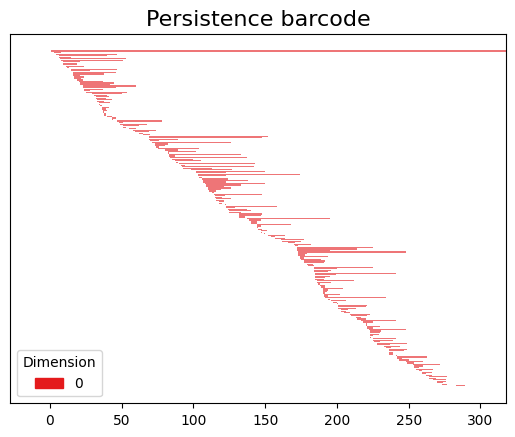

In [18]:
edges,node_heights = inputForGUDHI('m3p4_060407',1)

st = gudhi.SimplexTree()

#adds vertices assigned to their height as the filtration value
for node,height in node_heights.items():
    st.insert([node],filtration=height)

#adds edges with the maximum height as filtration value
for u,v in edges:
    filt_value = max(node_heights[u],node_heights[v])
    st.insert([u,v],filtration=filt_value)

st.make_filtration_non_decreasing()

st.compute_persistence()
gudhi.plot_persistence_barcode(st.persistence())